### Visión por Computadora I


Jorge Ceferino Valdez

Trabajo Práctico N° 2

- Implementar la función create_gauss_filter(h, w, k_size, sigma) para crear filtros gaussianos para filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada de Fourier.
    1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una imagen para validar el funcionamiento en el dominio espectral.
    2. Usando el método descripto en el paper “Image Sharpness Measure for Blurred Images in Frequency Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral.
    3. Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of
focus measure operators in shape-from-focus”

In [1]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [2]:
# mostrar version de python
print("Version de python: ", sys.version)
# mostrar version de opencv
print("Version de opencv: ", cv2.__version__)

# Version de python:  3.9.18 (main, Sep 11 2023, 13:41:44) 
# [GCC 11.2.0]
# Version de opencv:  4.8.1

Version de python:  3.9.18 (main, Sep 11 2023, 13:41:44) 
[GCC 11.2.0]
Version de opencv:  4.8.1


### Definimos los filtros en el dominio espectral

In [3]:
# Usando la libreria de opencv
def create_gauss_filter_cv(h, w, k_size=5, sigma=5):
    # Crear un kernel gaussiano en el dominio espacial
    gauss_kernel = cv2.getGaussianKernel(k_size, sigma)
    
    # Ampliar el kernel para que coincida con las dimensiones deseadas (h, w)
    gauss_kernel = np.outer(gauss_kernel, gauss_kernel.transpose())
    
    # Normalizar el kernel
    gauss_kernel = gauss_kernel / np.sum(gauss_kernel)
    
    # Calcular la transformada de Fourier del kernel gaussiano
    fft_gauss_kernel = np.fft.fft2(gauss_kernel, (h, w))
    #fft_gauss_kernel = np.fft.fftshift(fft_gauss_kernel)
    
    # Retornar el kernel gaussiano o filtro gaussiano de tamaño HxW
    # y su transformada de Fourier
    return gauss_kernel, fft_gauss_kernel

# Usando la libreria de numpy
def create_gauss_filter(h, w, k_size, sigma):
    y, x = np.meshgrid(np.arange(h) - h // 2, np.arange(w) - w // 2, indexing='ij')
    kernel = np.exp(-(x**2 + y**2) / (2. * sigma**2))
    kernel /= kernel.sum()  # Normalizar para que la suma sea 1

    # Zero-padding para obtener el tamaño deseado del kernel
    padded_kernel = np.zeros((h, w))
    padded_kernel[:kernel.shape[0], :kernel.shape[1]] = kernel

    # Calcular la transformada de Fourier del kernel
    fft_kernel = np.fft.fftshift(np.fft.fft2(padded_kernel))

    return padded_kernel, fft_kernel

def apply_filter(image, fft_kernel):
    # Convertir la imagen a escala de grises si es a color
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calcular la transformada de Fourier de la imagen
    fft_image = np.fft.fftshift(np.fft.fft2(image))

    # Aplicar el filtro en el dominio de la frecuencia
    filtered_fft_image = fft_image * fft_kernel

    # Obtener la imagen filtrada en el dominio espacial
    filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_fft_image)))

    return filtered_image.astype(np.uint8)

In [4]:
# Parámetros de ejemplo

# Cargar imagen
#image = cv2.imread('../data/fft_alfa_pred.png', cv2.IMREAD_GRAYSCALE)
image = cv2.imread('../data/enterprise.jpg', cv2.IMREAD_GRAYSCALE)

h, w = image.shape  # Tamaño de la imagen
k_size = 21  # Tamaño del kernel
sigma_values = [0.5, 1, 3, 7, 10]  # Valores de sigma para probar


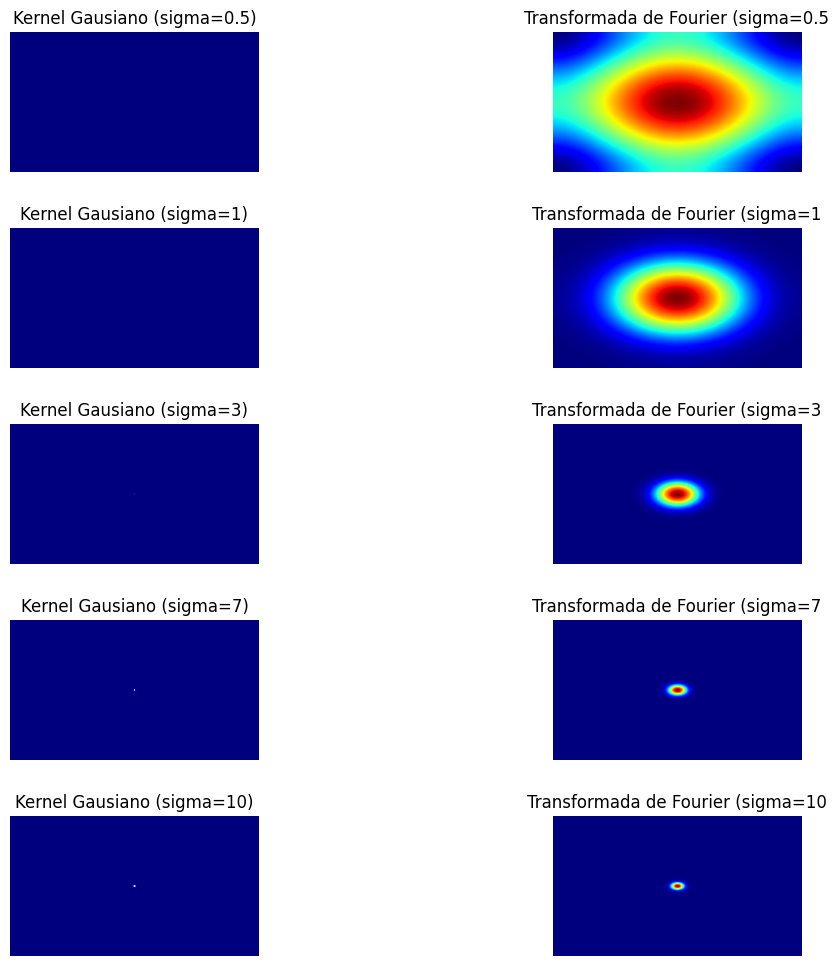

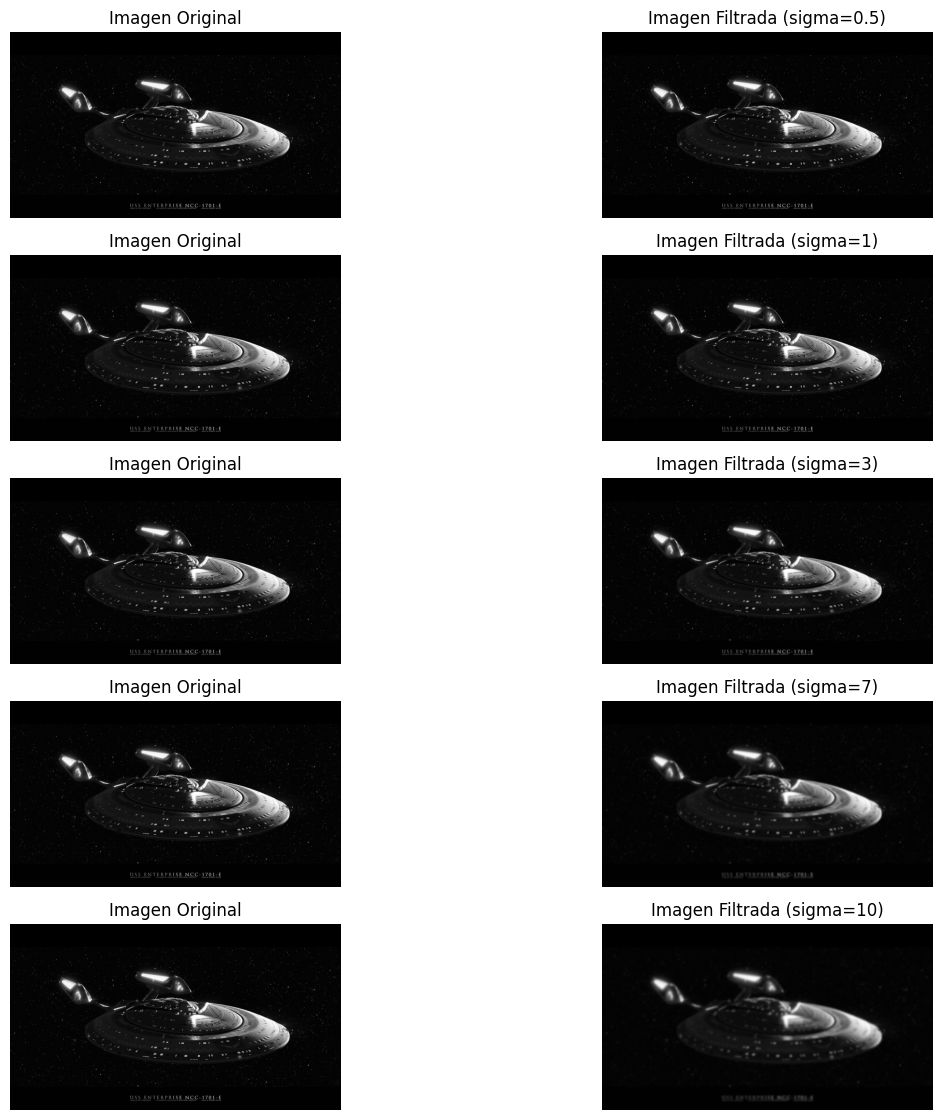

In [5]:
# Crear gráficos para diferentes tamaños de kernel y sigma
plt.figure(figsize=(12, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i, sigma in enumerate(sigma_values):
    # Crear filtro gaussiano y obtener su transformada de Fourier
    padded_kernel, fft_kernel = create_gauss_filter(h, w, k_size, sigma)

    # Graficar filtro gaussiano en el dominio espacial

    #plt.subplot(1,2,1)
    plt.subplot(len(sigma_values), 2, i*2+1)
    plt.axis('off')
    plt.title(f'Kernel Gausiano (sigma={sigma})')
    plt.imshow(padded_kernel, cmap='jet')    

    # Graficar transformada de Fourier del filtro gaussiano
    plt.subplot(len(sigma_values), 2, i*2+2)
    plt.axis('off')
    plt.title(f'Transformada de Fourier (sigma={sigma}')
    plt.imshow(np.log(np.abs(fft_kernel) + 1), cmap='jet')

# Aplicar filtro a la imagen de ejemplo fuera del bucle
plt.figure(figsize=(14, 14))
filtered_images = []

for sigma in sigma_values:
    _, fft_kernel = create_gauss_filter(h, w, k_size, sigma)
    filtered_image = apply_filter(image, fft_kernel)
    filtered_images.append(filtered_image)

# Visualizar la imagen original y la imagen filtrada para cada sigma
for i, sigma in enumerate(sigma_values):
    plt.subplot(len(sigma_values), 2, i*2+1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original')
    plt.axis('off')

    filtered_image_shift = np.fft.fftshift(filtered_images[i])
    plt.subplot(len(sigma_values), 2, i*2+2)
    #plt.imshow(filtered_images[i], cmap='gray')
    plt.imshow(filtered_image_shift, cmap='gray')
    plt.title(f'Imagen Filtrada (sigma={sigma})')
    plt.axis('off')

plt.show()